In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

### a) Descargar datos experimentales

### b) Cargar datos y realizar filtrado

In [2]:
Data = pd.read_csv('DataRotacion.csv')
filter = Data["angle"] == 30
h = Data[filter]["h"]
y = Data[filter]["y"]
sigmay = Data[filter]["sigmay"]
angle = Data[filter]["angle"]
g = 9.8
w0 = np.ones(1)


### c) Definir modelo Fisico

In [3]:
def coriolis_deviation(h0, lat, g, w):
    return (2 * np.sqrt(2) * w * np.cos(np.deg2rad(lat)) * np.sqrt(h0**3 / g))/3

### d) Defina Chi cuadrado

In [4]:
def chi_square(w, h, y, sigmay, angle, g):
    return np.sum((y - coriolis_deviation(h, angle, g, w))**2 / sigmay**2)


### e) Minimice usando optimize

In [5]:

aux = lambda *w: chi_square(*w)
result = optimize.minimize(aux, w0, args=(h, y, sigmay, angle, g), options={'disp': True})
bestparam = result.x
print(bestparam)

         Current function value: 2.291436
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
[7.24030776e-05]


### f) Dibuje los datos del modelo para dicha latitud

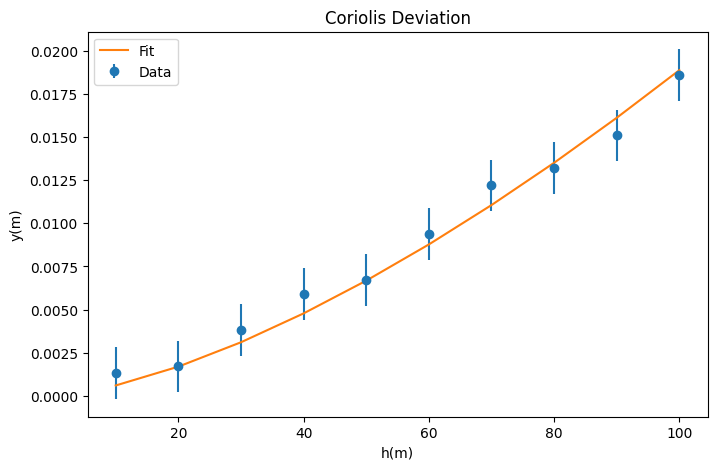

In [6]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.errorbar(h, y, sigmay, fmt='o', label='Data')
ax.plot(h, coriolis_deviation(h, angle, g, bestparam), label='Fit')
ax.set_xlabel('h(m)')
ax.set_ylabel('y(m)')
ax.set_title('Coriolis Deviation')
ax.legend()
plt.show()

# Parte 2

In [7]:
N = 300

In [8]:
Gravedad = np.zeros(N) 
y_new = np.zeros((N, len(y)))  

for i in range(300):
    g = 9.8 + np.random.normal(loc=0, scale=1)
    Gravedad[i] = g

    y_new[i] = y + np.random.normal(loc=0, scale=sigmay.iloc[0], size=len(y))


In [9]:
Omega = np.zeros(N)  

for i in range(N):
    g = Gravedad[i]
    y = y_new[i]

    aux = lambda *w: chi_square(*w)
    result = optimize.minimize(aux,
                               w0,
                               args=(h, y, sigmay, angle, g),
                               options={'disp': False})
    bestparam = result.x

    Omega[i] = bestparam[0]  


In [13]:
def Histogram_Data(Gravedad, Omega):
    gridy = np.linspace(min(Gravedad), max(Gravedad), 30)
    gridx = np.linspace(min(Omega), max(Omega), 30)
    H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(gridx, gridy))
    return H2, binsx, binsy

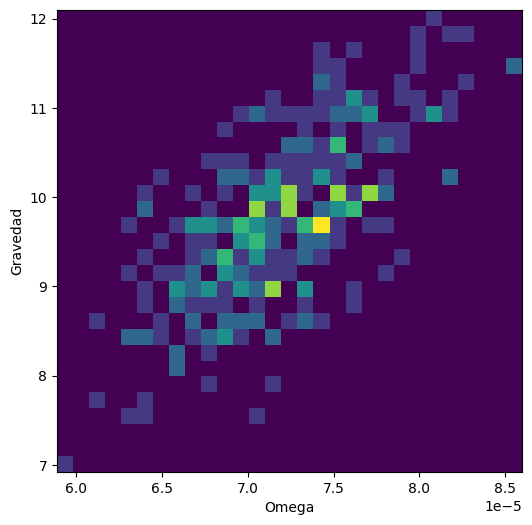

In [14]:
H2, binsx, binsy = Histogram_Data(Gravedad, Omega)

plt.figure(figsize=(6, 6))
plt.imshow(H2.T,
           origin='lower',
           extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]],
           aspect='auto')
plt.xlabel('Omega')
plt.ylabel('Gravedad')
plt.show()


### Debido a la linealidad aparante de los datos, se puede decir que ambas variables estan correlacionadas linealmente